<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-make-it-aesthetic/blob/master/MakeItAesthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it Aesthetic

# Table of Content
 1 Introduction
 
 2 Goals and Use Cases
  
 2.1 Our Goals

 2.2 Use Cases

 3 Theory and Methods
 
 4 Process
 
 5 Literature

# 1 Introduction

Photos are taken for various reasons.

Someone wants to document some situations, others want to keep their experience in memory. And someone takes photos because of art reasons. 

Almost everybody makes photos but not every photograph fulfills the criteria of an aesthetic photo. To change this we aim to be able to make every photo aesthetic. To reach this goal it is necessary to define the rules of an aesthetic photo and to define which object is the main object of the photo. These goals are described in the following chapter.



# 2 Goals and Use Cases
## 2.1 Goals
* make given images aesthetic

* selecting the guideline the image should follow

* Rule of Thirds

* Diagonal Dominance

* Visual Balance

* Golden Ratio

* by zooming and rotation the image

## 2.2 Use Cases
* making photos more aethstic for an photo album or for a website
  * vacation
    * sightseeing photos of buildings
    * nature photos of landscapes and detailed plants
  * wedding and over big events photos of people
  * art photos of detailed motives
* let the algorithms editing all your photos instead of doing it manually

# 3 Theory and Methods

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAJ7LcNQXUT0an5uu2FO_uclWl8MCq0wINJNh3oLrs-shr3_Hb5A)


Golden Ratio

![alt text](https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fencrypted-tbn0.gstatic.com%2Fimages%3Fq%3Dtbn%3AANd9GcQDsh2JSGxEuiQueDxc8Nv3exWChiSh6WRxRrh_LeffSCXFbiysFA&sp=008dda95fde15b3ee8aea0de9351ca23&anticache=923965)


Diagonal Dominance

![alt text](https://ianfrithrn.files.wordpress.com/2012/05/reduced1.jpg)

#4 Process

Import of important packages

In [0]:
import numpy as np
import cv2
from skimage import io
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

Import of pictures

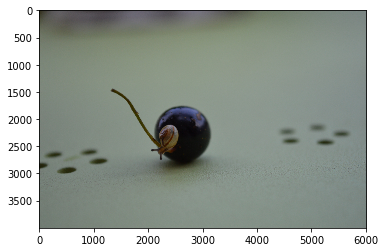

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/snail.JPG
img_snail = cv2.imread("snail.JPG") #gives the picture a variable
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB) #turns the color into the right color
plt.imshow(img_snail) #gives the picture out

Now we can see the image. The next step is to find out the size of the image in the x-axis (width of image) and in the y-axis (height of image). That happens with the **shape** function.

Now we can divide the width with 512 and the height with 512 by 3 to calculate the positions for the lines of the **Rule of Thirds**.

Now we calculated the position of the first line in the height of the image. Because the height of the image is equal to the width we already calculated the line in the width of the image. The second line will be at the position 170.666 + 170.666 = 341.332.

Now we are able to draw the line into the image with the **cv2.line()** function. Therefore we have to know to points: For 

In this function the photo will be preprocessed in the sense that it determines the size of the image. Therefore we use the **shape**-function of *open CV*. To calculate the first line for the RT it divides the height (resp. the width) of the photo by 3. Therefore the "//" operator is used since we need integer values for the further processing. For the second horizontal line the height is divided by 3 too but now the result is multiplied by 2. Similarly for the vertical line.


In [0]:
def generate_image_data(img):
  height = img.shape[0]
  width = img.shape[1]

  #calulating the lines for the rule of thirds
  third_of_height_1 = height // 3
  third_of_height_2 = (height // 3) * 2
  third_of_width_1 = width // 3
  third_of_width_2 = (width // 3) * 2
  return height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2


The following function called **draw_rule_of_thirds** is used to draw the lines of the *Rule of Thirds* (RT) on the given photo. The function requireds an object of type *img*, the colour the lines should appear and the line width for the RT-lines. It returns an object of type *img*.

After the preprocessing in the **generate_image_data** function we have all information to draw the RT-lines. Therefore we use the **axhline**-function of *matplotlib* for the horizontal lines and similarly the **axvline**-function for the vertical lines. Since we have images with different colours we have to draw the RT-lines in black or white depending on the average colour of the picture. To determine the average colour we add up all pixels of the gray version of the image and divide the sum by total amount of pixels of the image matrix.

At the end the function returns the photo with the RT-lines on it. The RT-lines are shown in a different layer as the image is shown. Since we do not want to have the line in the image later on.


In [0]:
def draw_rule_of_thirds(img):
  #calulating the height and width of the image and the lines for the rule of thirds
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)

  #calculating the average_brightness of the image
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  average_brightness = img_gray.sum() // (len(img_gray)*len(img_gray[0]))
 

  #define the line color in dependence of the brightness
  if average_brightness >= 129:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'k')
    plt.axhline(y = third_of_height_2, color = 'k')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'k')
    plt.axvline(x = third_of_width_2, color = 'k')
  else:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'w')
    plt.axhline(y = third_of_height_2, color = 'w')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'w')
    plt.axvline(x = third_of_width_2, color = 'w')
  return img

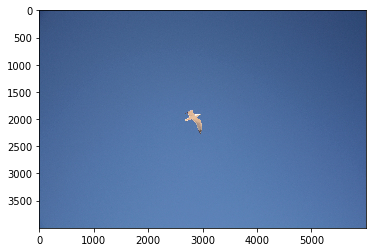

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/moewe.JPG
img_seagull = cv2.imread("moewe.JPG")
img_seagull = cv2.cvtColor(img_seagull, cv2.COLOR_BGR2RGB)
plt.imshow(img_seagull)

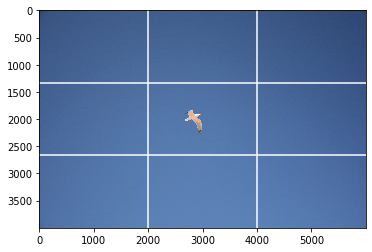

In [0]:
draw_rule_of_thirds(img_seagull)
plt.imshow(img_seagull)

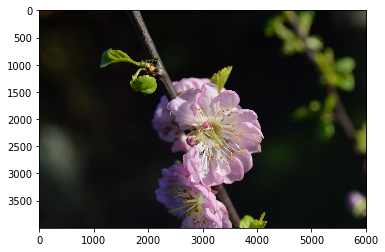

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/flower.JPEG
img = cv2.imread("flower.JPEG")
img_flower = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_flower)

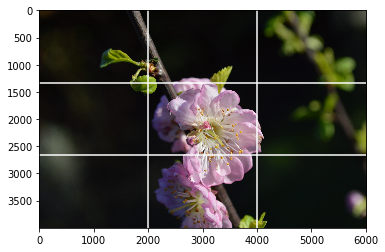

In [0]:
draw_rule_of_thirds(img_flower)
plt.imshow(img_flower)

### Calculation of the points of interests
Now we determine the **points of interest** by calculating the intersections of the lines.


In [0]:
def poi(img):
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 =generate_image_data(img)

  poi1 = tuple([third_of_height_1, third_of_width_1])
  poi2 = tuple([third_of_height_1, third_of_width_2])
  poi3 = tuple([third_of_height_2, third_of_width_1])
  poi4 = tuple([third_of_height_2, third_of_width_2])

  print(poi1)
  print(poi2)
  print(poi3)
  print(poi4)

In [0]:
poi(img_snail)

(1333, 2005)
(1333, 4010)
(2666, 2005)
(2666, 4010)


# Detect Horizons

Test by Konrad, erosion dilation

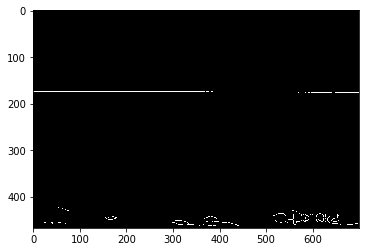

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
img = cv2.imread('goodhorizon.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11,11),2)
edges = cv2.Canny(blur,50,150,apertureSize = 3)
plt.imshow(edges, 'gray')


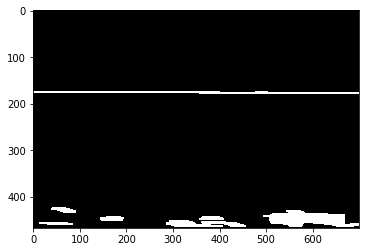

In [0]:
kernel = np.ones((2,10),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 3)
plt.imshow(dilation, 'gray')

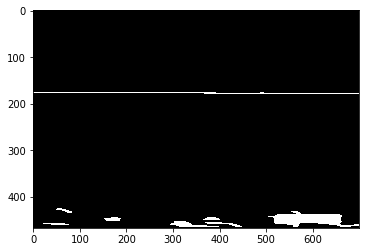

In [0]:
erosion = cv2.erode(dilation,kernel,iterations = 2)
plt.imshow(erosion, 'gray')

In [0]:
def detect_horizon(img):
  result = np.copy(img)
  #preprocessing of the image to detect lines
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (11,11),2)
  edges = cv2.Canny(blur,50,150,apertureSize = 3)

  #dilate and erose the binary image to extract better lines
  kernel = np.ones((2,10),np.uint8)
  dilation = cv2.dilate(edges,kernel,iterations = 3)
  erosion = cv2.erode(dilation,kernel,iterations = 2)

  #get the width of the image to calculate the minimal length of the line in the
  #image in dependence of the width of the image
  height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(erosion)
  
  #define the arguments for the function of the Hough Line Transformation
  rho = 1  # distance resolution in pixels of the Hough grid
  theta = np.pi / 180  # angular resolution in radians of the Hough grid
  threshold = 15  # minimum number of votes (intersections in Hough grid cell)
  min_line_length = int(width*0.05)  # minimum number of pixels making up a line
  max_line_gap = 20  # maximum gap in pixels between connectable line segments
  line_image = np.copy(img) * 0  # creating a blank to draw lines on

  # Run Hough on edge detected image
  # Output "lines" is an array containing endpoints of detected line segments
  lines = cv2.HoughLinesP(erosion, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
        print(x1,y1,x2,y2)
        #draw the detected lines into the image
        image_line = cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        lines_edges = cv2.addWeighted(result, 0.8, line_image, 1, 0)
    return img, edges, dilation, erosion, image_line, lines_edges
  else: #if no lines are detected
    print("Konnte leider keine Linien erkennen.") 

0 177 598 177
309 462 360 461
518 454 661 446
519 456 661 449
368 178 699 178
0 176 408 176
517 453 609 447
520 457 592 455
38 460 77 460
527 458 572 458
514 443 549 443
408 459 443 461
575 443 611 441
573 440 611 439
575 447 610 445
504 441 547 440
580 179 699 179
296 459 338 457
569 450 661 455
575 444 611 443
296 457 332 454
321 463 386 463
504 442 549 441
295 458 334 455
541 450 659 456
389 455 436 459
518 455 571 457
522 451 584 454
582 448 661 451
526 453 586 456
304 458 381 462
386 455 441 460
404 458 447 464
604 450 661 461


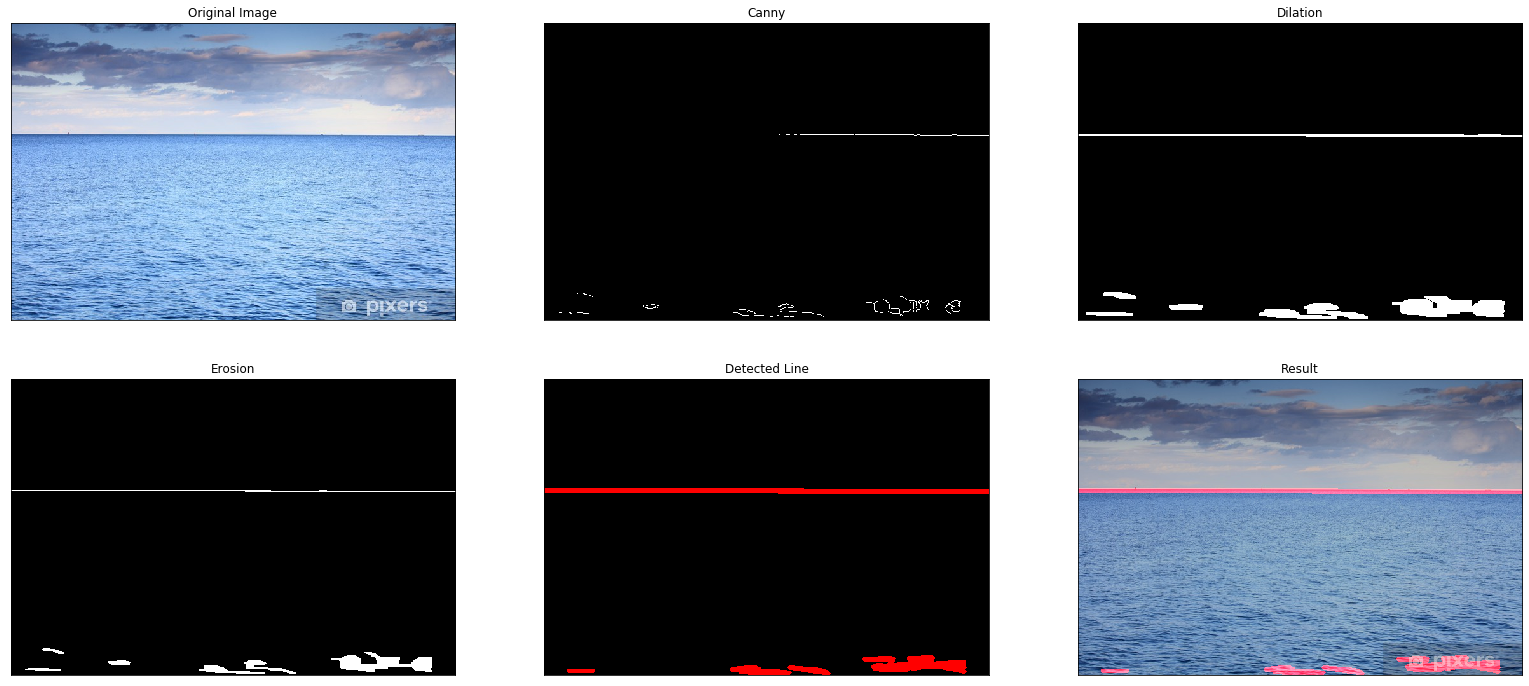

In [161]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
img = cv2.imread('goodhorizon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

530 621 637 621
645 614 710 613
613 633 795 630
1038 606 1161 600
56 639 164 637
527 620 596 618
395 623 493 623
851 613 961 606
702 626 799 626
339 622 494 622
206 625 371 625
936 610 1014 606
396 624 488 624
28 608 93 609
636 626 798 623
698 630 799 628
602 625 695 622
107 627 270 627
772 614 936 606
32 607 92 608
0 647 83 644
0 619 95 617
833 638 903 634
969 627 1113 622
56 642 162 638
56 635 117 634
968 626 1114 621
1029 599 1111 603
29 616 95 616
0 620 95 620
966 624 1040 622
53 632 115 631
48 647 129 646
721 625 798 624
814 608 895 611
995 627 1109 623
1006 603 1105 605
1008 601 1107 604
56 643 139 640
56 636 160 638
54 648 119 648
611 625 761 622
1023 627 1098 625
23 619 95 619
749 613 813 614
668 623 770 621
1117 597 1186 606
701 630 773 630
653 611 777 611
53 631 117 632
603 628 677 633
1065 600 1143 602
8 646 79 650
346 621 429 619
972 627 1108 623
33 611 93 610
56 634 121 635
839 608 904 609
56 638 131 639
32 610 92 607
55 633 117 633
352 621 448 620
171 625 230 626


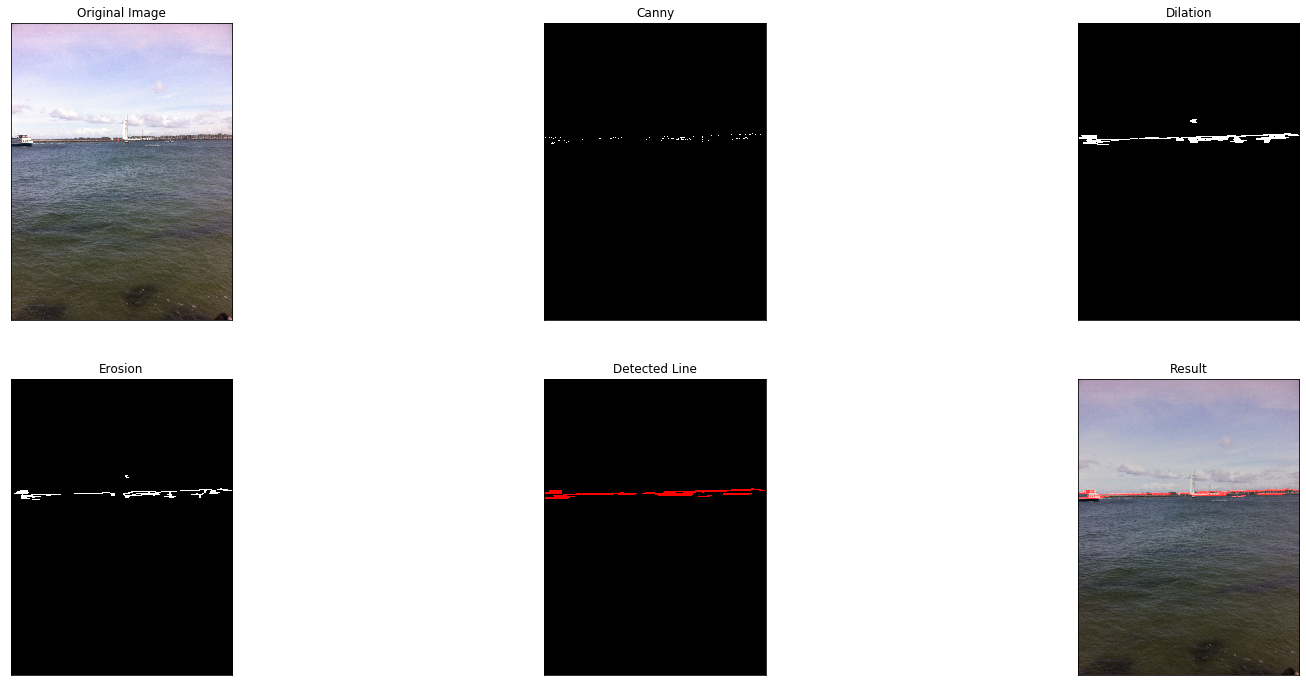

In [163]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex5.JPG
img = cv2.imread('ex5.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

758 2051 1437 2182
2601 2408 2858 2458
3276 2544 3713 2629
3791 2648 4016 2691
606 2024 1130 2125
1145 2124 1989 2288
524 2100 879 2195
3816 2651 4026 2691
1317 2156 1634 2217
2359 2590 2578 2648
3640 2942 3945 3023
3615 2936 3940 3023
744 3023 744 2505
709 3023 709 2473
223 2619 437 2833
993 3020 1001 2524
1998 2572 2011 2947
2909 2665 3180 2718
822 3023 822 2525
2024 2294 2310 2354
1101 3006 1106 2705
1328 1701 1609 1706
991 2990 999 2524
823 3023 823 2525
708 3023 708 2473
1106 3011 1111 2705
3608 2936 3935 3023
516 2100 772 2168
19 1916 295 1969
997 3023 1006 2523
742 3023 742 2505
1047 2959 1052 2631
705 3023 705 2473
1050 2960 1056 2631
824 3023 824 2525
1057 2903 1057 2631
1068 2238 1347 2312
703 3023 703 2520
1165 3023 1172 2818
706 3023 706 2473
739 3023 739 2514
826 3023 826 2525
781 3023 781 2777
1997 2572 2010 2947
780 3023 780 2777
704 3023 704 2473
743 3023 743 2505
707 3023 707 2473
821 3023 821 2525
818 3023 818 2711
740 3023 740 2507
710 3023 710 2473
779 3023 779 2777

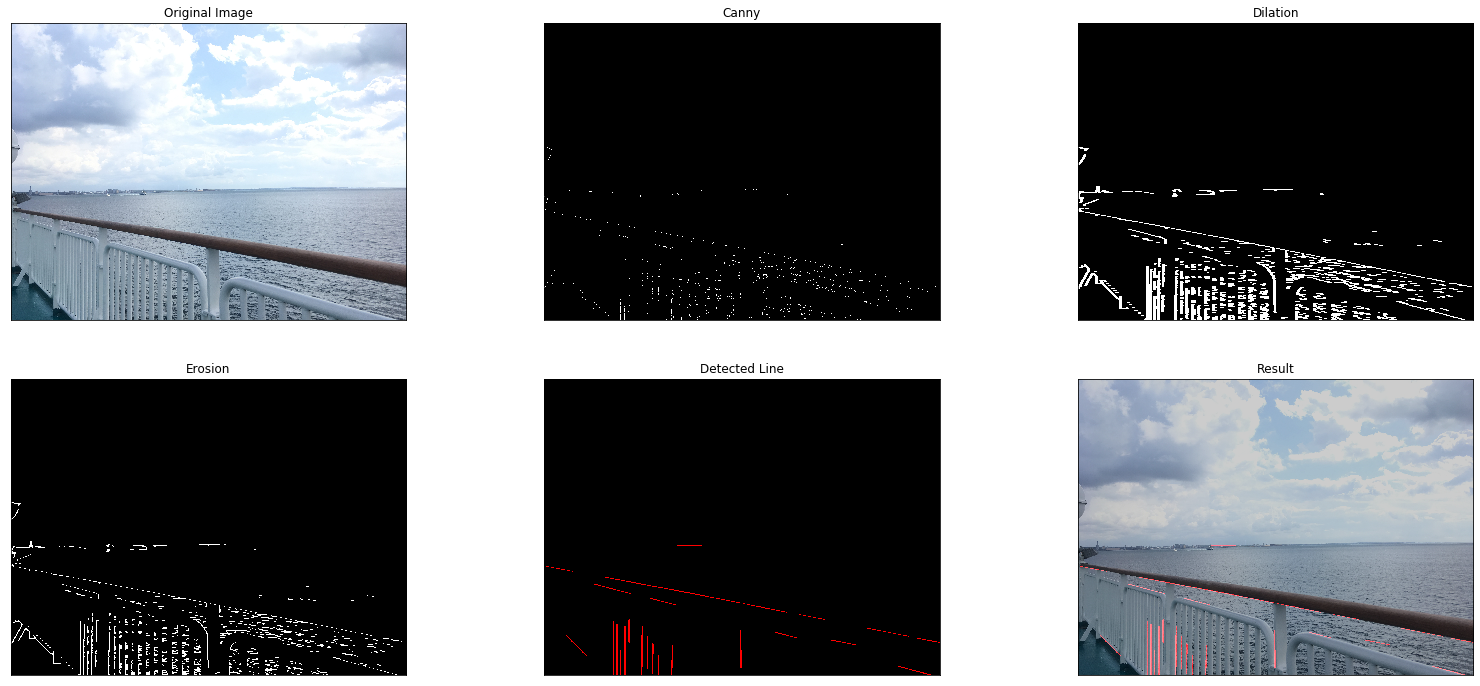

In [164]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex6.JPG
img = cv2.imread('ex6.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1776 1173 1926 1163
1157 1220 1314 1210
1697 1178 1923 1162
760 1245 1103 1228
2027 1157 2178 1144
709 1247 925 1236
2267 1139 2587 1111
77 1270 209 1265
2130 1151 2312 1136
1905 1166 2121 1148
818 1243 1103 1229
2187 1147 2340 1134
2348 1130 2493 1118
1116 1222 1264 1214


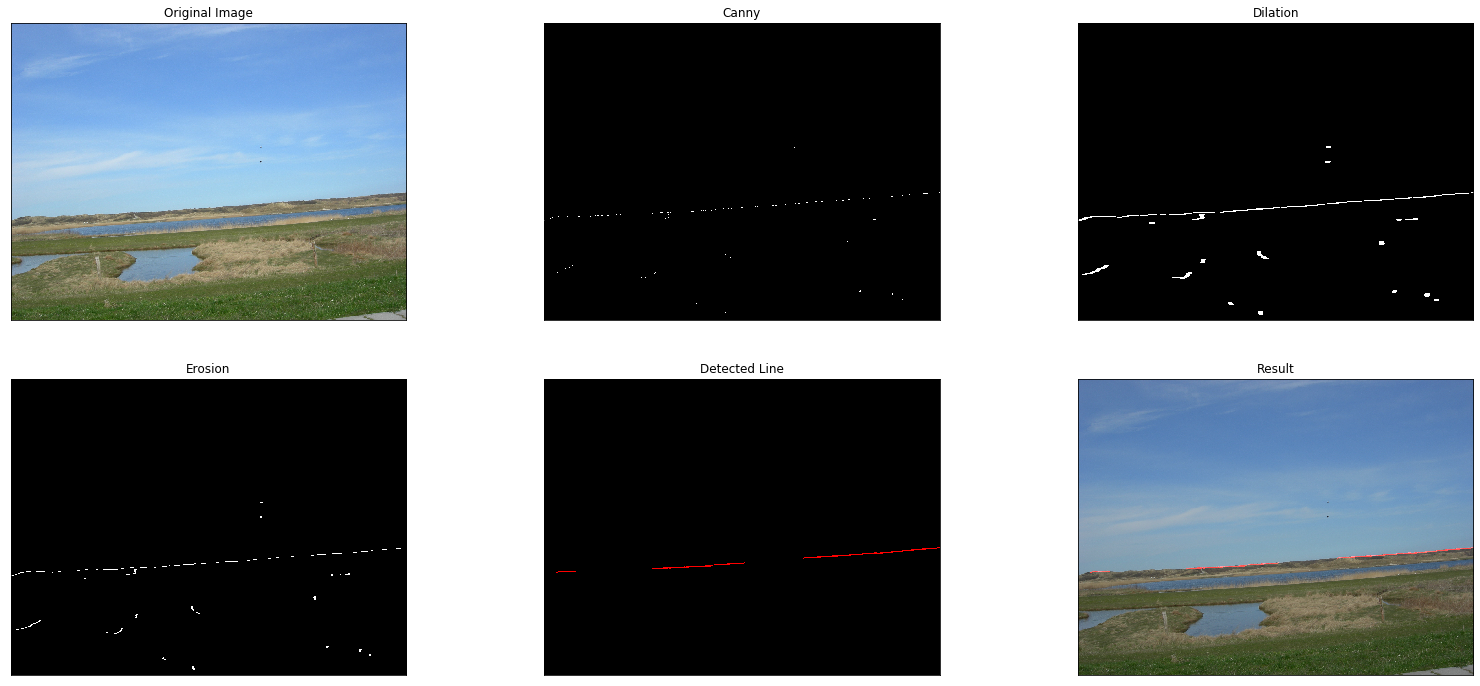

In [165]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/DSCN0053.jpg
img = cv2.imread('DSCN0053.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

900 1401 1135 1520
2236 2283 2476 2360
1383 1993 1619 2056
403 1791 700 1865
1083 1846 1388 2151
263 1542 460 1552
1377 2079 1703 2124
357 1172 666 1290
1607 2032 1852 2136
1982 1844 2176 1930
762 1858 959 1911
2317 2202 2531 2280
946 1547 1181 1571
967 1934 1261 2007
1291 1568 1523 1671
1029 1894 1270 1963
2204 2166 2403 2295
1528 1627 1723 1709
1533 1530 1773 1563
1077 1022 1292 988
2681 2349 2893 2498
345 1172 683 1301
766 1650 962 1691
2953 2381 3214 2460
1234 1409 1489 1544
2258 2297 2456 2361
20 1940 337 2001
662 1745 867 1773
123 2031 321 2059
671 1687 872 1748
1931 2075 2130 2135
2386 1834 2597 1871
11 1478 241 1510
32 1031 243 1107
1821 1790 2019 1803
1430 801 1641 908
1934 1834 2151 1930
2 1745 255 1812
599 2179 987 2172
1735 1788 1932 1871
369 1534 598 1562
1421 1881 1617 1964
1227 1547 1436 1561
1000 987 1323 1010
913 1390 1107 1434
768 1790 1244 1899
1560 1556 1770 1571
405 1146 659 1265
442 1759 761 1770
910 993 1234 1027
2935 2377 3163 2446
1595 2013 1795 2123
1313 1758 

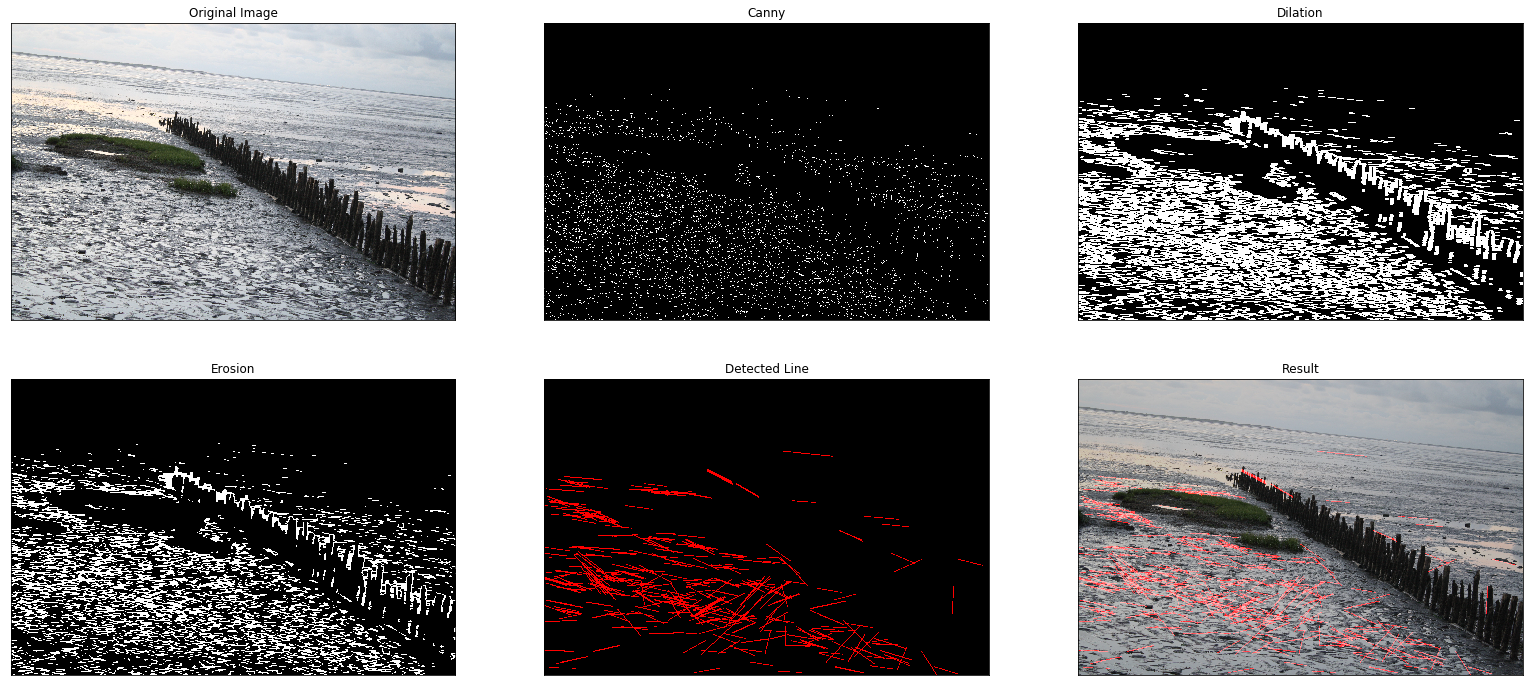

In [166]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_diagonal.jpg
img = cv2.imread('beach_diagonal.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1505 1596 1762 1588
2653 1902 2859 1916
124 2027 328 2027
98 2067 320 2044
8 1987 352 2023
2299 1889 2510 1885
2660 1903 2858 1917
124 2026 351 2026
591 1627 1122 1609
1885 2540 2114 2483
3454 2056 3703 2052
3222 1952 3420 1973
236 2078 495 2047
471 2094 707 2094
216 2084 487 2050
517 1870 722 1870
2021 2500 2240 2496
2203 1517 2445 1509
235 2080 499 2047
1 1987 350 2023
78 2029 320 2029
519 1869 722 1869
2051 2496 2250 2503
23 2028 327 2028
517 1871 720 1871
1090 1478 1404 1468
1946 1454 2323 1447
1517 1723 1756 1693
15 1986 224 2008
1744 1459 2129 1452
1446 1597 1653 1590
0 1633 252 1624
2102 1519 2387 1510
1451 1466 1780 1460
695 1625 1018 1614
964 1481 1217 1473
2149 1449 2364 1445
292 1634 545 1626


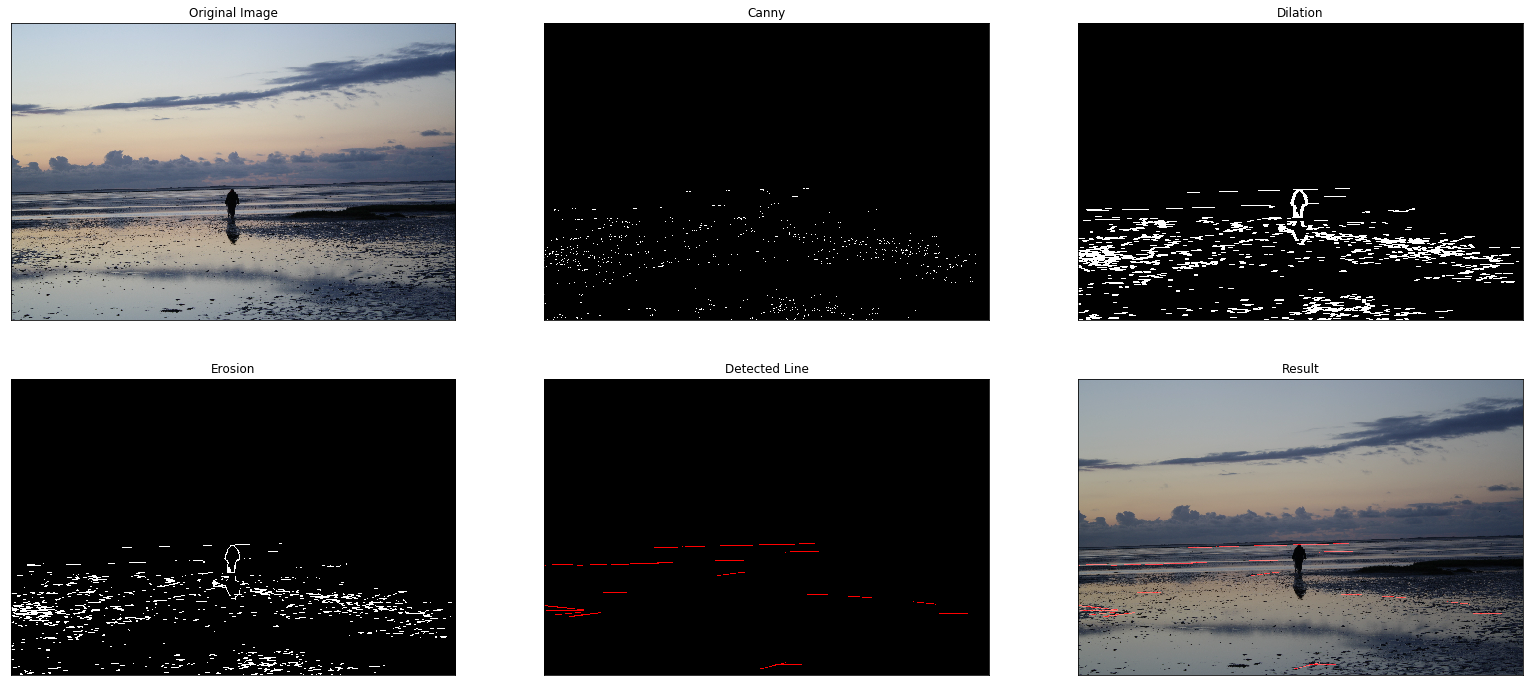

In [167]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_oneperson.jpg
img = cv2.imread('beach_oneperson.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1518 1695 2885 1695
2470 1684 2922 1684
2518 1697 2885 1697
2326 1687 2923 1687
2182 1693 2886 1693
2182 1694 2886 1694
2326 1689 2923 1689
2325 1691 2886 1691
2326 1688 2923 1688
2470 1682 2921 1682
2326 1690 2886 1690
1167 1482 1564 1476
2358 1685 2923 1685
1515 1696 2457 1696
2327 1686 2923 1686
2470 1681 2920 1681
2325 1692 2886 1692
2470 1683 2922 1683
2148 1467 2454 1461
1464 1516 1781 1516
2664 1680 2920 1680
2010 1513 2410 1507
1021 1483 1230 1480
1602 1515 1876 1515
2442 1508 2642 1505
1221 1519 1425 1519
1775 1469 2015 1469
1332 1517 1610 1517
1761 1470 1967 1470
1289 1518 1507 1518
2132 1697 2454 1697


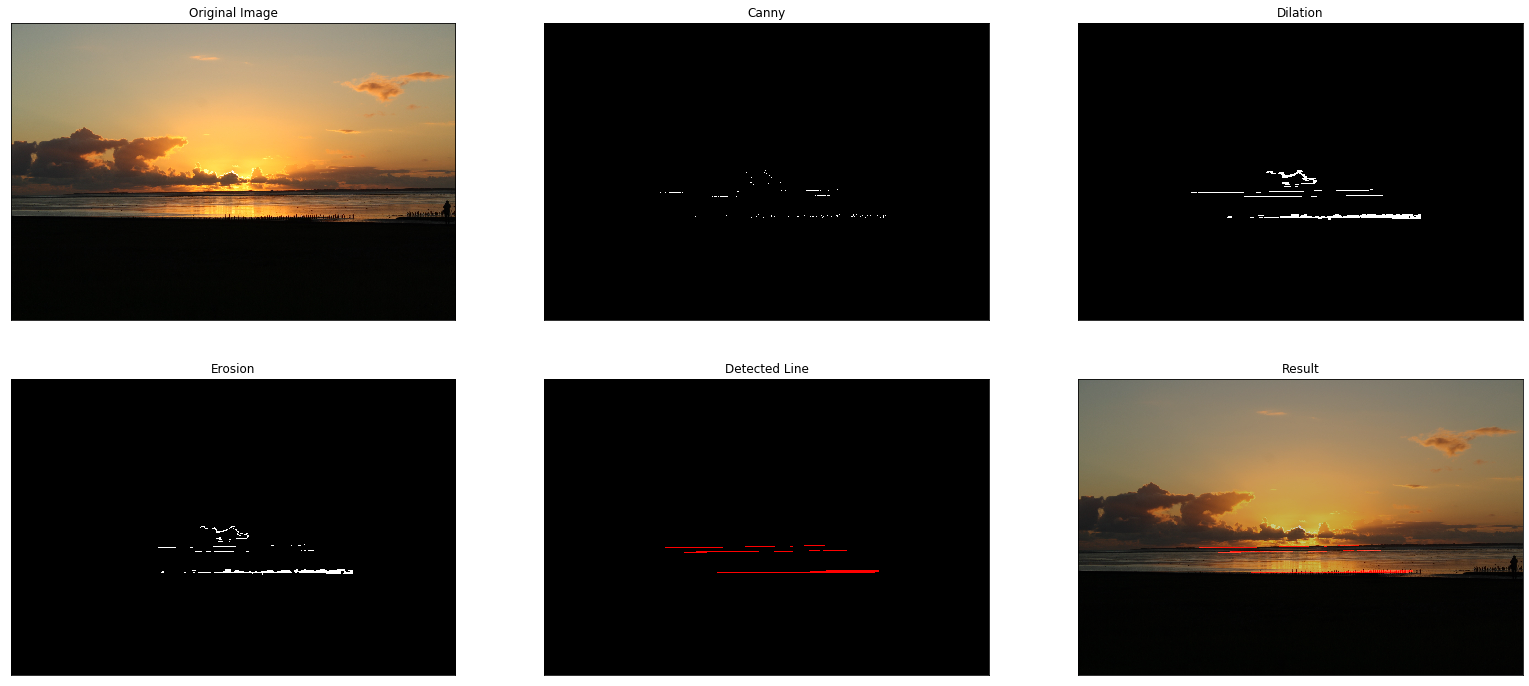

In [168]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_sun.jpg
img = cv2.imread('beach_sun.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1507 1871 1901 1858
866 1933 1121 1915
1484 1802 1706 1802
2431 1811 2704 1811
2498 1966 2715 1947
1863 2433 2360 2467
3642 1778 3837 1775
420 1910 725 1905
1608 1780 1903 1780
1615 2400 1905 2426
1495 2402 1758 2425
985 1846 1180 1842
1503 2404 1758 2427
1378 1975 1616 1963
2565 1943 2882 1927
2398 1802 2855 1795
2831 1897 3165 1886
300 1380 1261 1313
581 2308 827 2325
714 1846 919 1860
2063 2174 2261 2170
1346 1826 1559 1819
215 2288 449 2288
2179 1868 2439 1845
1801 1812 2012 1805
1315 1283 2220 1268
79 2039 295 2039
2422 1809 2768 1803
3048 2416 3254 2423
3488 1810 3735 1798
2315 1998 2553 1969
125 2008 414 1993
3022 2128 3229 2128
2702 1988 2965 1970
2260 1732 2526 1736
1368 2110 1629 2110
30 2011 414 1991
1194 2044 1457 2035
2493 1964 2703 1946
2221 1934 2427 1906
1552 2405 2123 2445
1428 2054 1629 2019
2148 1783 2589 1783
338 1941 551 1934
2575 2491 2789 2517
2021 1814 2344 1798
2019 2284 2241 2292
2032 2188 2273 2184
272 2030 488 2023
2652 1990 2858 1976
1955 2446 2367 2475
180

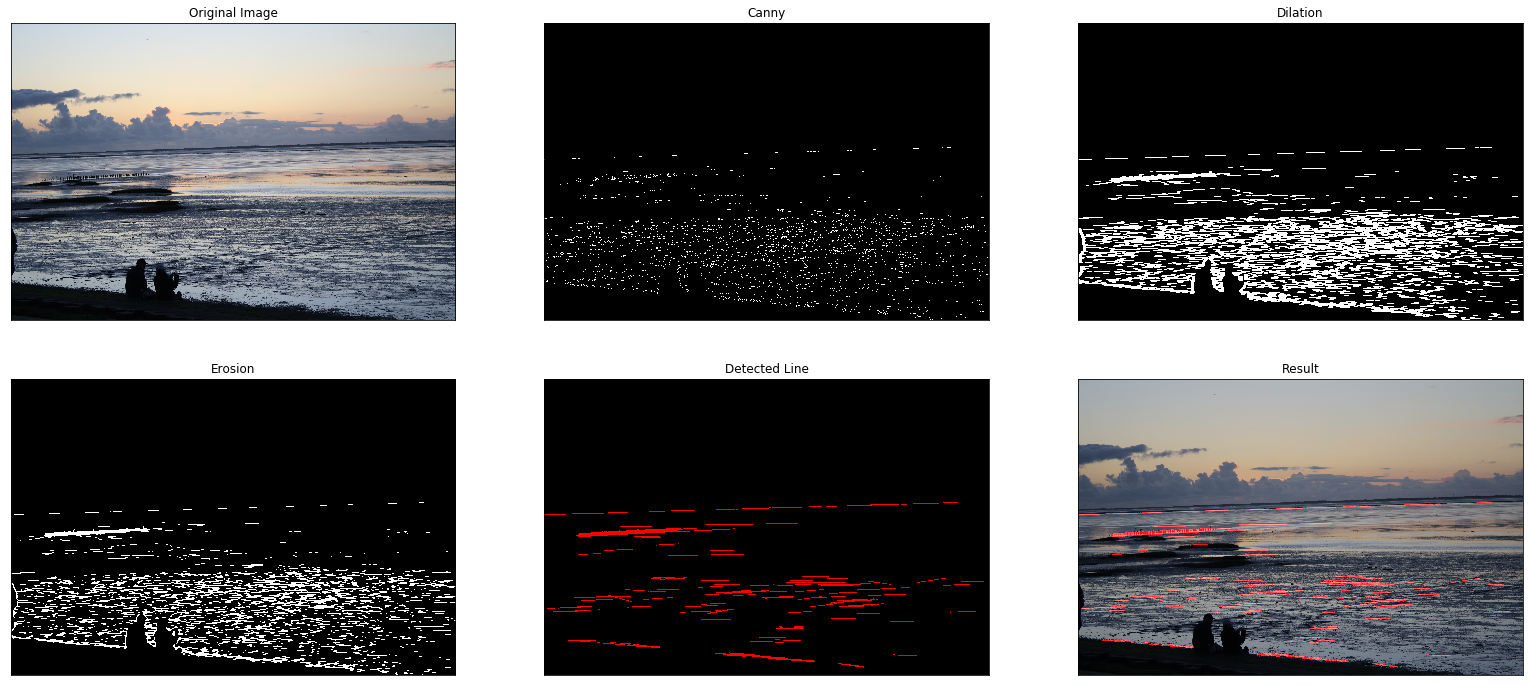

In [169]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_twopeople.jpg
img = cv2.imread('beach_twopeople.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
# Draw the lines on the  image
line_image = np.copy(img)*0
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(lines_edges, 'gray')

# Detect Circles

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/circle.png
img = cv2.imread('circle.png')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
median = cv2.medianBlur(gray, 5)
plt.imshow(median, 'gray')

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 1, 30, param1=50, param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(circles)
for (x, y, r) in detected_circles[0,:]:
  img_circle = cv2.circle(output, (x, y), r, (0, 255, 0), 3)
  cv2.circle(output, (x, y), 2, (255, 0, 0), 3) 

plt.imshow(img_circle)



In [0]:
! wget -q https://raw.githubusercontent.com/.../Pictures/grafik.png
img = cv2.imread('snail.JPG')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 0.9, 120, param1=50, 
                           param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(detected_circles)
for i in circles[0,:]:
  #draw the outer circle
  img_circle = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 10)
  #draw center of circle
  img_center = cv2.circle( img, (i[0], i[1]), 2, (0, 0, 255), 5)

titles = ['Grayscale image', 'Image with circles']
rt_circle = draw_rule_of_thirds(img_circle)
images = [gray, img_circle, rt_circle]

plt.imshow(img_circle)
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i], 'gray')
    plt.subplots_adjust(left=1.0, bottom=1.0, right=3.0, top=2.0)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
  print('i[0]', i[0])
  print('i[1]', i[1])
  print('i[2]', i[2])
  
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i], 'gray')
    #plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()